### Census Income Prediction

#### Problem statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). 
A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

#### Features

* Age - Age of single entry of the population
* Workclass - Working class of single entry of the population
* Fnlwgt - process followed in calculating this feature is mentioned above
* Education - Education of the single entry of the population
* Education_num - Education numbers
* Marital status - marital status of the single entry of the population
* Occupation - entries for primary occupation of the single entry of the population
* Relationship - relationship of single entry of the population
* Race - Race of single entry of the population
* Sex - Sex of the single entry of the population
* Capital gain - Capital gain of single entry of the population
* Capital loss - Capital loss of single entry of the population
* Hours_per_week - Hours they work per week 
* Native_country - Country of residence
* Income - Target feature which categorises into above 50k and below 50k

In [94]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [95]:
# upload the dataset
df=pd.read_csv("C:/Users/HP/anaconda3/DataScience/DataTrainedProjects/EvaluationProjects/census.csv")

In [96]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [97]:
# shape of the dataset
df.shape

(32560, 15)

### EDA

In [98]:
# grouping categorical columns
cat_cols = [x for x in df.columns if df[x].dtypes=='O']
df[cat_cols].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [99]:
# grouping numerical columns
num_cols = [y for y in df.columns if df[y].dtypes!='O']
df[num_cols].head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [100]:
# checking the shape of the dataset
df.shape

(32560, 15)

In [101]:
# checking for any null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [102]:
# checking the datatype of each columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [103]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [104]:
# checking statistical parameters
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### Key insights:

* mean is almost same as median for Age,Fnlwgt,Education_num,Hours_per_week
* mean is having variance with median for Capital_gain,Capital_loss
* Dataset is not having any null values
* Looks like Capital gain,Capital loss,FnlWgt is having skewness
* we have 6 columns of type int and all others are of the type object
* Target variable is having two outcomes either >=50k or <=50k

### Univariate Analysis

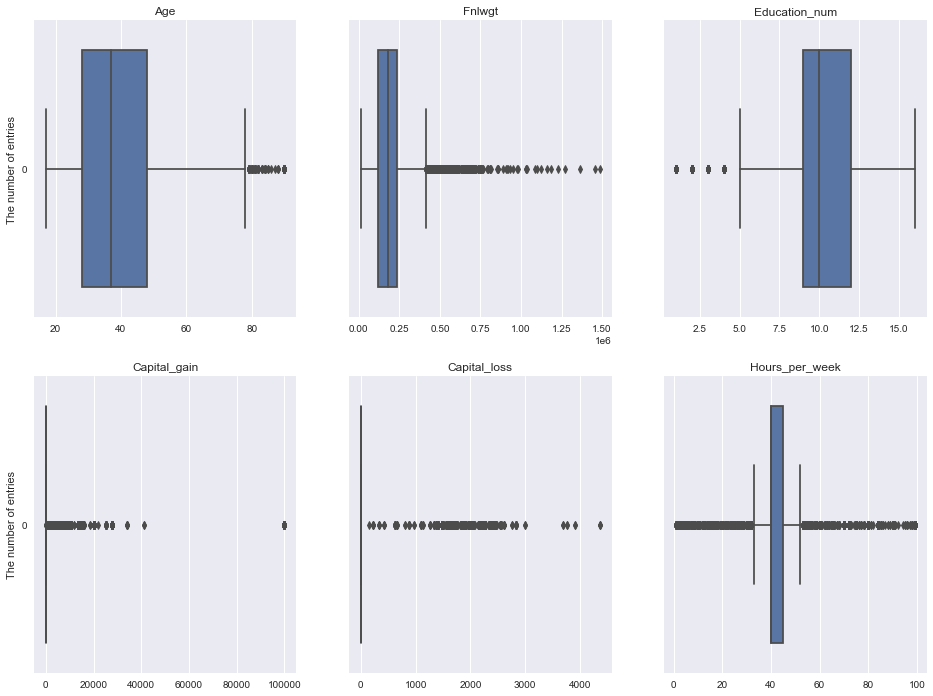

In [105]:
# check for outliers

def boxplots_custom(dataset, columns_list, rows, cols, subtitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
#     fig.subtitle(subtitle,y=0.63, size=14)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=num_cols, rows=2, cols=3, subtitle='Boxplots before deleting outliers')

In [106]:
# deleting outliers

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df_new = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) |(df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df_new.shape)

Here we will get IQR for each column
 Age                   20.0
Fnlwgt            119223.0
Education_num          3.0
Capital_gain           0.0
Capital_loss           0.0
Hours_per_week         5.0
dtype: float64


(18997, 15)

<Figure size 1080x864 with 0 Axes>

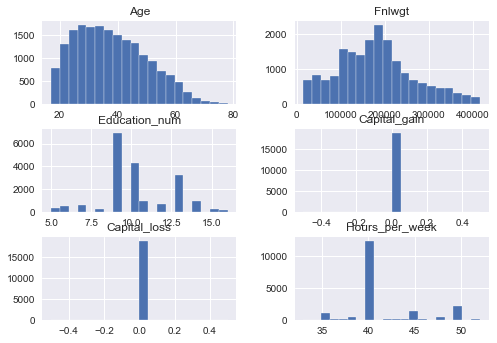

In [107]:
# find skewness by plotting histplot

plt.figure(figsize=(15,12))
df_new.hist(bins=20)
plt.show()

 histograms are only used to plot the frequency of score occurrences in a continuous data set that has been divided into classes, called bins.

###### Inferance:
* majority of the population are of the age range 25-45. Basically range of the population is from 20 -80.
* Age data is Right skewed
* Fnlwgt is normally distributed and has negligable skewness
* we have 2k people of Fnlwgt more than 2 lakhs 
* we dont see any skewness in capital gain & loss as we saw it by using skew() function
* all of the capital gain & loss values are of the value 0

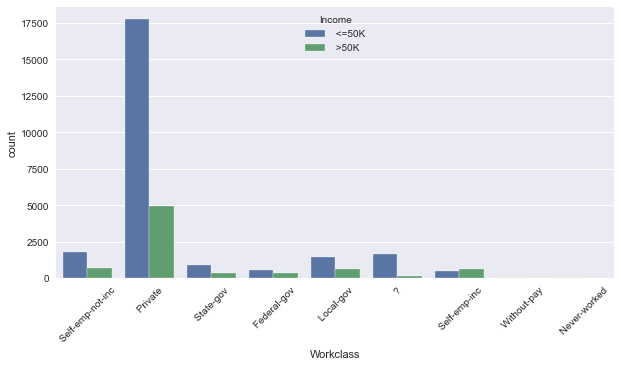

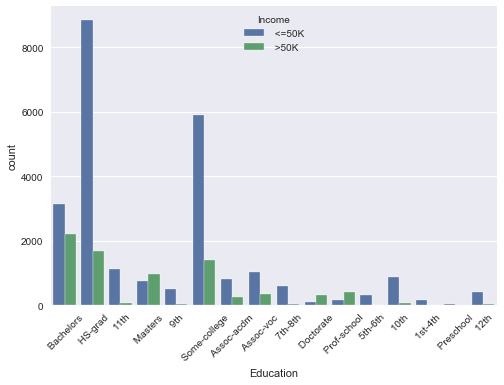

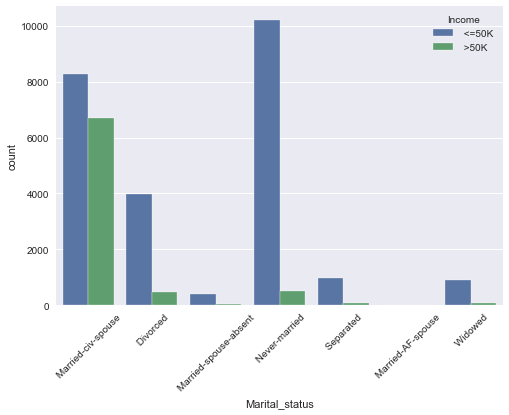

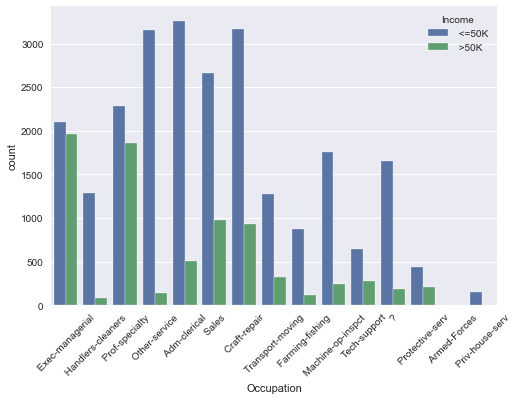

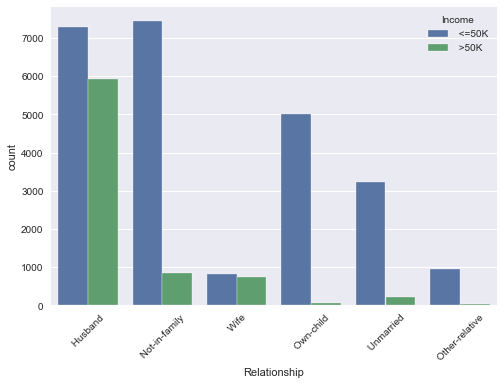

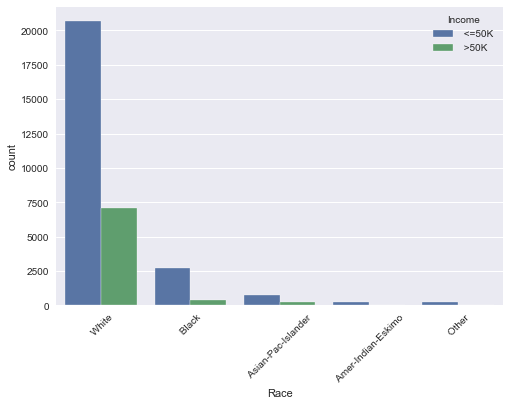

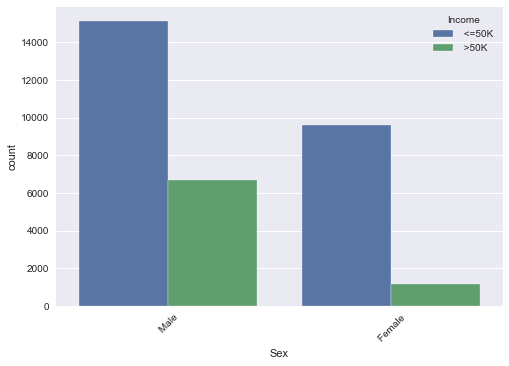

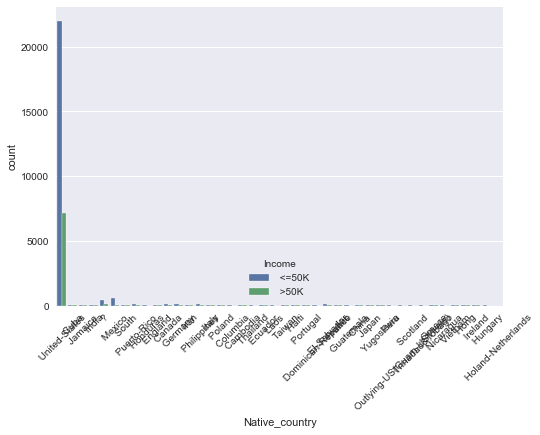

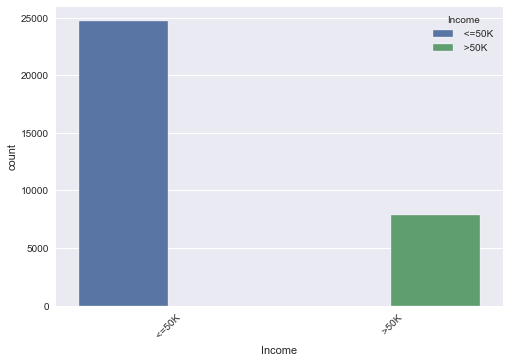

In [108]:
# plotting count of the individual features
plt.figure(figsize=(10,5))
for i in df[cat_cols]:
    chart = sns.countplot(x=i,data=df,hue='Income')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.show()


##### Inference:
* most of the population are working in private sector and most of them have income <=50k
* there are least count who are either neer worked and have without pay
* most of the population who earn <=50k are high school grads
* Majority of the people who are earning >=50k are Bachelors in some field
* Most of the people who are married are earning >=50k and who are earning <=50k are never married
* Majority of the population who are earning >=50k are either Exec-managerial or professors
* Majority of them who are earning <=50k are Admin-clerical,sales,Craft-repair and Transport depts
* Since majority of the US people are of the Race white the income earning by them are high than of the race Black
* Majority of the Males are earning either <=50k or >=50k compared to females
* According to the chart majority of the population are of Native country cuba
* On an avaerage majority of the population earns <=50k 

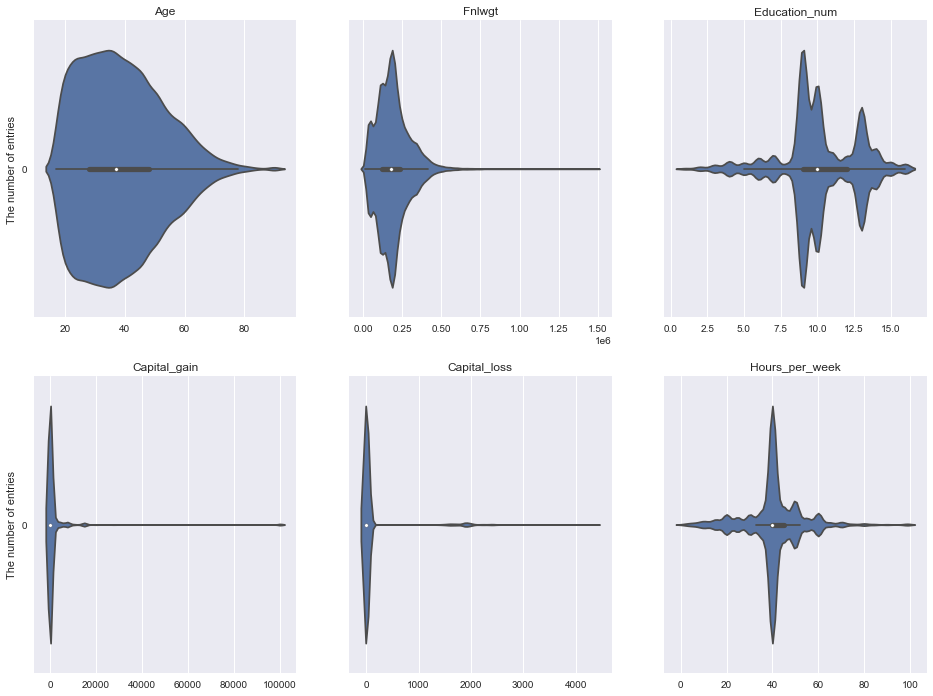

In [109]:
# plotting violin plot to check the min and max range of the occurances
def violinplots_custom(dataset, columns_list, rows, cols, subtitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
#     fig.subtitle(subtitle,y=0.63, size=14)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.violinplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
violinplots_custom(dataset=df, columns_list=num_cols, rows=2, cols=3, subtitle='Violin plots')

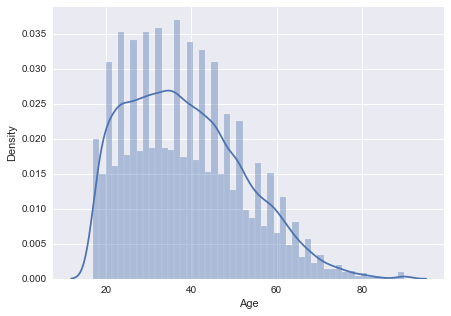

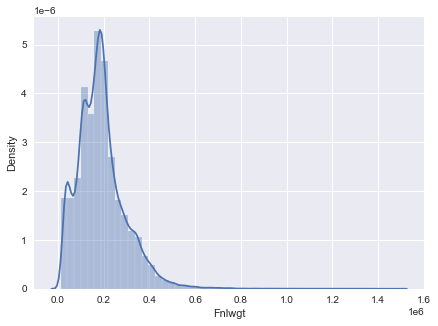

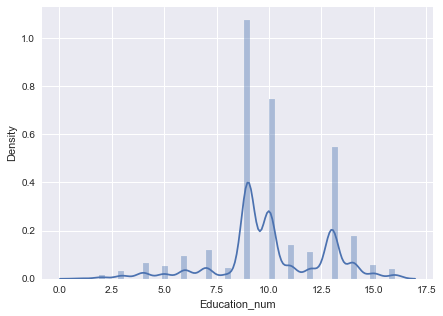

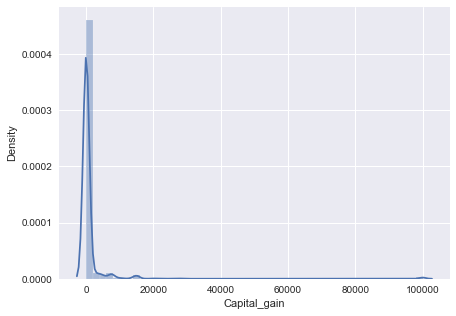

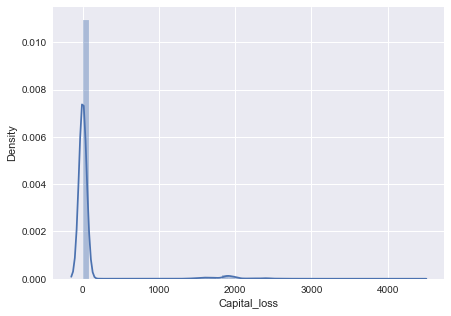

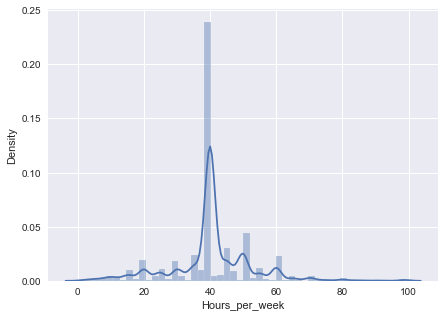

In [110]:
# plotting distplot to check the distributions of each feature

for i in num_cols:
    plt.figure(figsize=(7,5))
    sns.distplot(df[i],hist=True,kde=True)
    plt.show()

#### Inference:
* chart shows Capital Loss,Capital gain,Fnlwgt are right skewed 
* Age,Education_num,Hours_per_week are normally distributed 
- We will remove the skewness later

### Multivariate Analysis

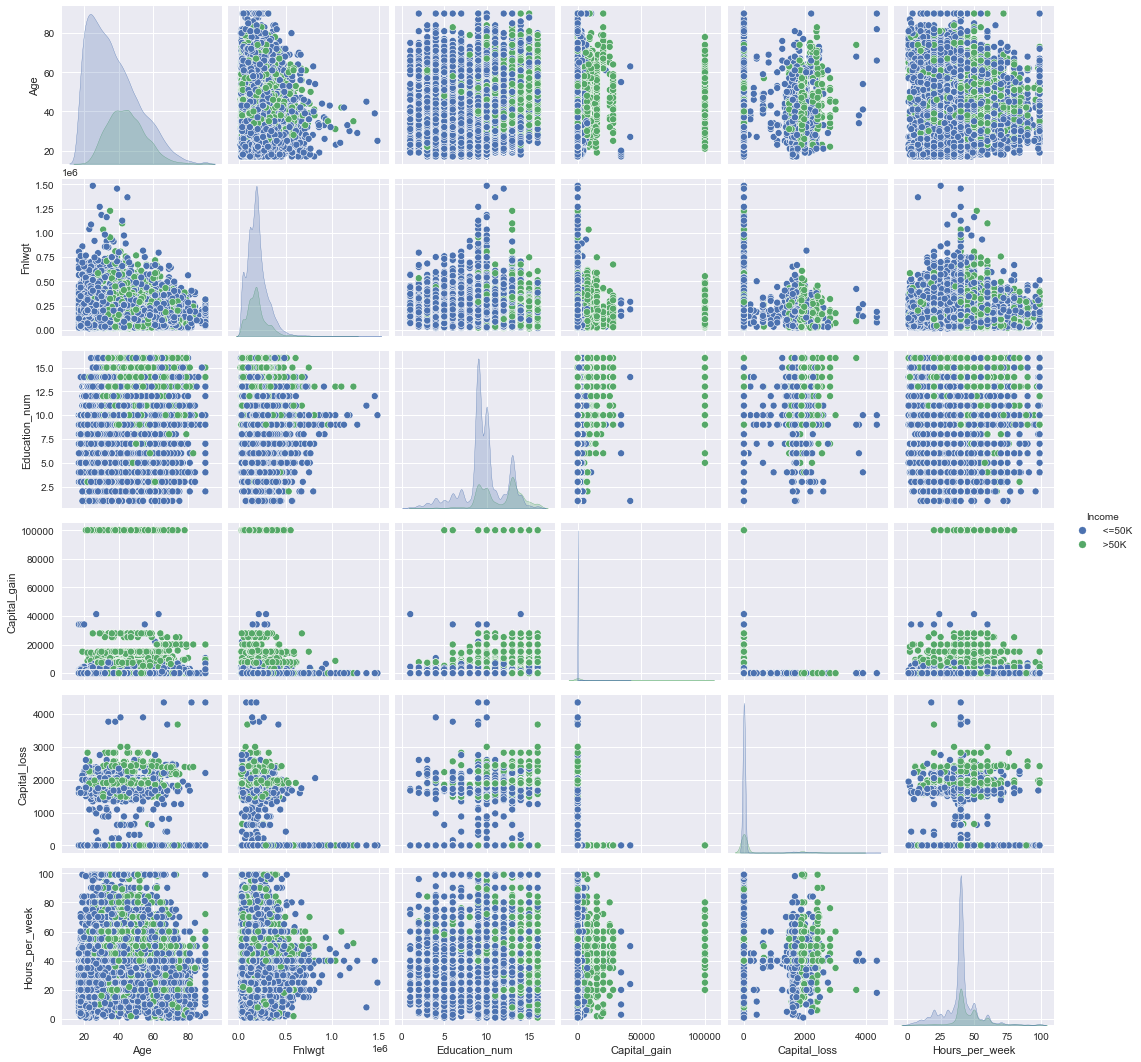

In [111]:
# plotting pairplot to check the relationship with multiple bivariate features
sns.pairplot(df,hue='Income')
plt.show()

##### Inference:

* Majority of the population of all ages earn <=50k
* Majority of all Educated population who work 15- 60 hours/week earn <=50k & less of them earn >=50k
* Some of the population who works from 0-100 hrs/week & earns <=50k are having capital gain of 0-10000 & many of them who earn >=50k are having capital gain of 10k-30k
* Many of thm who earn either <=50k or >=50k are having capital loss of 2000
* and so on

In [114]:
# categorical variables to classes using Label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new[cat_cols]=df[cat_cols].apply(le.fit_transform)

In [117]:
df_new['Occupation']=df_new['Occupation'].replace("?",df_new['Occupation'].mean())
df_new['Workclass']=df_new['Workclass'].replace("?",df_new['Workclass'].mean())

In [118]:
num_cols=df_new.columns.drop('Capital_loss','Capital_gain')

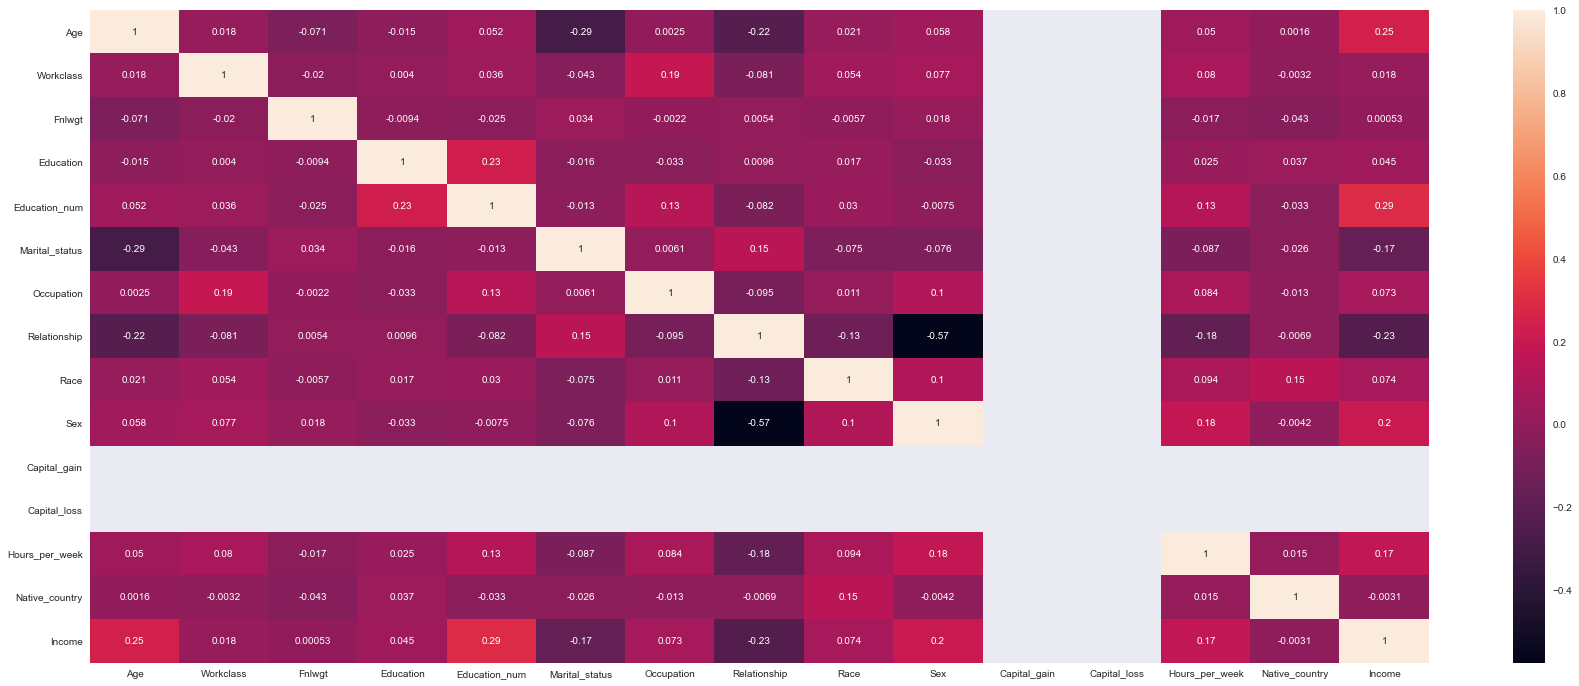

In [119]:
# plotting heatmap to see the corelation between the two variables

df_corr=df_new.corr()
plt.figure(figsize=(30,12))
sns.heatmap(df_corr,annot=True)
plt.show()

#### capital gain & loss is having no impact on the target variable. So, we decide to drop those two columns. single value and the correlation between each and every input variable with the target variable. So we decide to not drop any of the columns

In [120]:
new_cols=num_cols.drop(['Capital_gain','Income'])

In [121]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1:]

In [122]:
#Removing skewness
df_new.skew()
from sklearn.preprocessing import power_transform
x[new_cols]=power_transform(x[new_cols],method='yeo-johnson')

In [123]:
#import al the necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.utils import resample
# x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

### Resampling

From previously ran observations, we got that the samples of True 1's are having less samples than of 0's by knowing the f1score. 
So we will Resample it to get possibly high f1 score

In [124]:
y.head()

,Income
1,0
2,0
3,0
4,0
6,1


### Data modelling

In [125]:
from sklearn.utils import resample
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)
#combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)
# separate minority and majority classes
negative = train_data[train_data.Income==0]
positive = train_data[train_data.Income==1]
# upsample minority
neg_upsampled = resample(negative,
 replace=True, # sample with replacement
 n_samples=len(positive), # match number in majority class
 random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([positive, neg_upsampled])
# check new class counts
upsampled.Income.value_counts()

1    2751
0    2751
Name: Income, dtype: int64

In [126]:
x= upsampled.iloc[:,:-1]
y= upsampled.iloc[:,-1:]

In [127]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

##### Scaling the Dataset

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_x=scaler.fit_transform(x_train)
standardized_xtest=scaler.fit_transform(x_test)
df_standardized = pd.DataFrame(data=standardized_x)
df_standardized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.805375,-1.373344,0.726525,1.531336,-0.285693,1.196620,1.007847,1.352240,0.388797,0.583447,0.0,0.0,-0.354648,0.307425
1,1.114061,0.007645,0.743856,1.531336,-0.285693,-1.846729,1.189069,1.607885,0.388797,-1.713951,0.0,0.0,1.401607,0.307425
2,0.077640,0.007645,-0.406936,1.531336,-0.285693,-0.267855,0.201167,-0.837137,0.388797,0.583447,0.0,0.0,1.676370,0.307425
3,0.842291,-1.373344,-0.082985,-0.621296,1.010839,-0.267855,1.007847,-0.837137,0.388797,0.583447,0.0,0.0,0.685787,0.307425
4,-0.554233,0.007645,-0.548246,0.025827,-0.750030,-0.267855,1.189069,-0.837137,0.388797,0.583447,0.0,0.0,0.685787,0.307425


In [129]:
models= [('lr',LogisticRegression()),('rfc',RandomForestClassifier()),('etc',ExtraTreesClassifier()),('bgc',BaggingClassifier()),
        ('gbc',GradientBoostingClassifier()),('dtc',DecisionTreeClassifier()),('knn',KNeighborsClassifier()),
        ('bnb',BernoulliNB()),('svc',SVC())]

#### Cross-validation scores

In [130]:
#function to find crossValidation score of different models

def basic_model_selection(x,y,cross_folds,model):
    scores=[]
    names = []
    for i,j in model:
        cv_scores = cross_val_score(j, x, y, cv=cross_folds,n_jobs=-1)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k],scores[k].mean())

In [131]:
basic_model_selection(df_standardized,y_train,10,models)

lr 0.7538308323800552
rfc 0.7917347419419958
etc 0.7844613417670414
bgc 0.7722636430926586
gbc 0.7925085795033981
dtc 0.7418733598008209
knn 0.7556362290559182
bnb 0.7296743153219836
svc 0.7777067492093399


In [132]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

#### Hyper parameter tuning

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# defining parameters

param_grid_rfc = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini','entropy'],
    'random_state':[30,42,0],
    'max_depth':[2,1,0]
}
param_etc = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini','entropy'],
    'random_state':[30,42,0],
    'max_depth':[2,1,0]
}
clf = GridSearchCV(RandomForestClassifier(),param_grid_rfc)
clf.fit(standardized_x,y_train)
# check cross validation scores of best models and comaping it to get best among the best models

rfcscore = cross_val_score(RandomForestClassifier(),standardized_x,y_train,cv=2)
rfcm = rfcscore.mean()
print('Cross Val Score of RFC:',rfcm*100)

print("Best Parameters %s" % clf.best_params_)

etc = GridSearchCV(ExtraTreesClassifier(),param_etc)
etc.fit(standardized_x,y_train)

etcscore = cross_val_score(ExtraTreesClassifier(),standardized_x,y_train,cv=10)
etcm = etcscore.mean()
print('Cross Val Score of ETC:',etcm*100)

print("Best Parameters %s" %etc.best_params_)

Cross Val Score of RFC: 79.25213415867623
Best Parameters {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 200, 'random_state': 0}
Cross Val Score of ETC: 78.31660049794765
Best Parameters {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 200, 'random_state': 42}


##### using RandomForestClassifier

In [134]:
rfc= RandomForestClassifier(n_jobs=5,max_features= 'auto' ,n_estimators=200, oob_score = True,random_state=0,criterion='entropy')
rfc.fit(standardized_x, y_train)
rfc.score(standardized_x, y_train)
pred_rfc = rfc.predict(standardized_xtest)

rfcs= accuracy_score(y_test,pred_rfc)
print('Accuracy Score',rfcs*100)

Accuracy Score 80.557238037553


In [135]:
print(classification_report(pred_rfc,y_test))
confusion_matrix(pred_rfc,y_test)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       805
           1       0.81      0.82      0.81       846

    accuracy                           0.81      1651
   macro avg       0.81      0.81      0.81      1651
weighted avg       0.81      0.81      0.81      1651



array([[640, 165],
       [156, 690]], dtype=int64)

##### using ExtraTreesClassifier

In [136]:
etc = ExtraTreesClassifier(n_jobs=5,max_features= 'auto' ,n_estimators=200, random_state=30,criterion='entropy',max_depth=2)
etc.fit(standardized_x, y_train)
etc.score(standardized_x, y_train)
pred_etc = etc.predict(standardized_xtest)

etcs= accuracy_score(y_test,pred_etc)
print('Accuracy Score',etcs*100)

Accuracy Score 74.86371895820714


In [137]:
print(classification_report(pred_etc,y_test))
confusion_matrix(pred_etc,y_test)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       755
           1       0.78      0.75      0.76       896

    accuracy                           0.75      1651
   macro avg       0.75      0.75      0.75      1651
weighted avg       0.75      0.75      0.75      1651



array([[568, 187],
       [228, 668]], dtype=int64)

Since we got better accuracy,f1 score for Random forest classifier, we will select the same to predict the possibilities


##### using Upsampling

In [138]:
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [139]:
smt = SMOTE(sampling_strategy=1.0)
X_smote, y_smote = smt.fit_resample(standardized_x, y_train)

In [140]:
smote= RandomForestClassifier(n_jobs=5,max_features= 'sqrt' ,n_estimators=100, oob_score = True,random_state=42,criterion='entropy')
smote.fit(X_smote, y_smote)
smote.score(X_smote, y_smote)
smote_pred= rfc.predict(standardized_xtest)

rfcs= accuracy_score(y_test,smote_pred)
print('Accuracy Score',rfcs*100)

Accuracy Score 80.557238037553


[0.1772599  0.05264568 0.15681484 0.0439264  0.09349054 0.09618153
 0.09537456 0.14580807 0.01675166 0.03798847 0.         0.
 0.06536741 0.01839093]


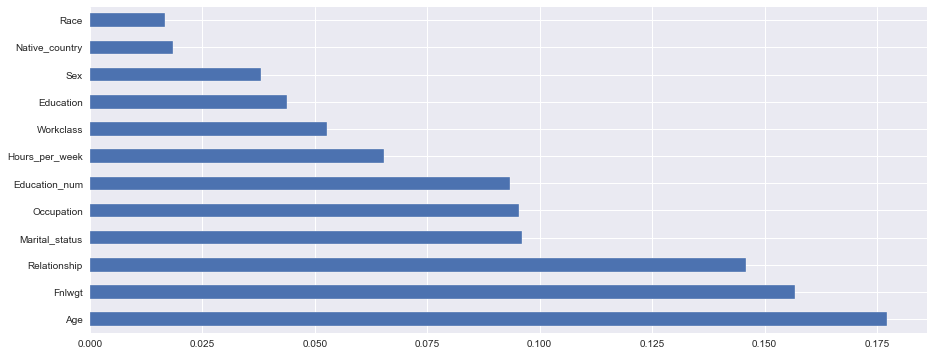

In [141]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

# we will plot the feature importance of the Extra TreesClassifier

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_smote,y_smote)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [142]:
etc= ExtraTreesClassifier(n_jobs=5,max_features= 'sqrt' ,n_estimators=100, random_state=42,criterion='entropy')
etc.fit(X_smote, y_smote)
etc.score(X_smote, y_smote)
smote_pred1= etc.predict(standardized_xtest)

rfcs= accuracy_score(y_test,smote_pred1)
print('Accuracy Score',rfcs*100)

Accuracy Score 80.13325257419746


###### Since we got pretty much high score for ETC after considering resampling we will select the same to plot the roc_curve

In [143]:
pred_prob1 = rfc.predict_proba(standardized_xtest)
pred_prob2 = etc.predict_proba(standardized_xtest)
pred_prob3 = smote.predict_proba(standardized_xtest)

In [144]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3)

0.887537835375709 0.8833840253901085 0.8857944694231391


### AUC-ROC Curve

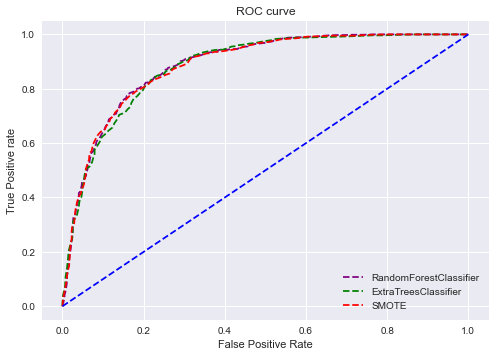

In [145]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='purple', label='RandomForestClassifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='ExtraTreesClassifier')
plt.plot(fpr3, tpr3, linestyle='--',color='Red', label='SMOTE')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

###### Roc_auc_curve for ETC model is giving comparitively best performance than all other model after Upsampling so we will select the same to predict our outcomes on our test data set

In [146]:
predicted_df={"Predicted Loan_Status":smote_pred1,"Original Loan_Status":y_test.Income.ravel()}
predicted_df=pd.DataFrame(predicted_df)
y_test.value_counts()

Income
1         855
0         796
dtype: int64

In [155]:
# creating pickle file 
import pickle
filename = 'Census_income.pkl'
pickle.dump(rfc, open(filename, 'wb'))

In [156]:
loaded_model = pickle.load(open('Census_income.pkl', 'rb'))
result = loaded_model.score(standardized_xtest, y_test.Income.ravel())
print(result*100)

80.557238037553


In [157]:
conclusion=pd.DataFrame([loaded_model.predict(standardized_xtest)[:],y_test.Income.ravel()[:]],index=["Predicted","Original"])

In [158]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650
Predicted,0,1,0,0,1,0,1,1,0,1,...,1,0,0,0,0,1,1,1,0,0
Original,0,1,0,0,1,0,1,1,0,0,...,0,1,0,0,0,1,1,1,0,0


###### Conclusion:

we are pretty much sure that we are getting the right prediction compared to the original values for Income categories.so we will consider the ETC model to build model 